# Reproduction of Fig. 6 of Armand 2020

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/2166853995.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['Mass', 'Fe_H']).size().reset_index(name='counts')
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/2166853995.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('1.0-0.85', '1.15-1.0', '1.3-1.15 '))


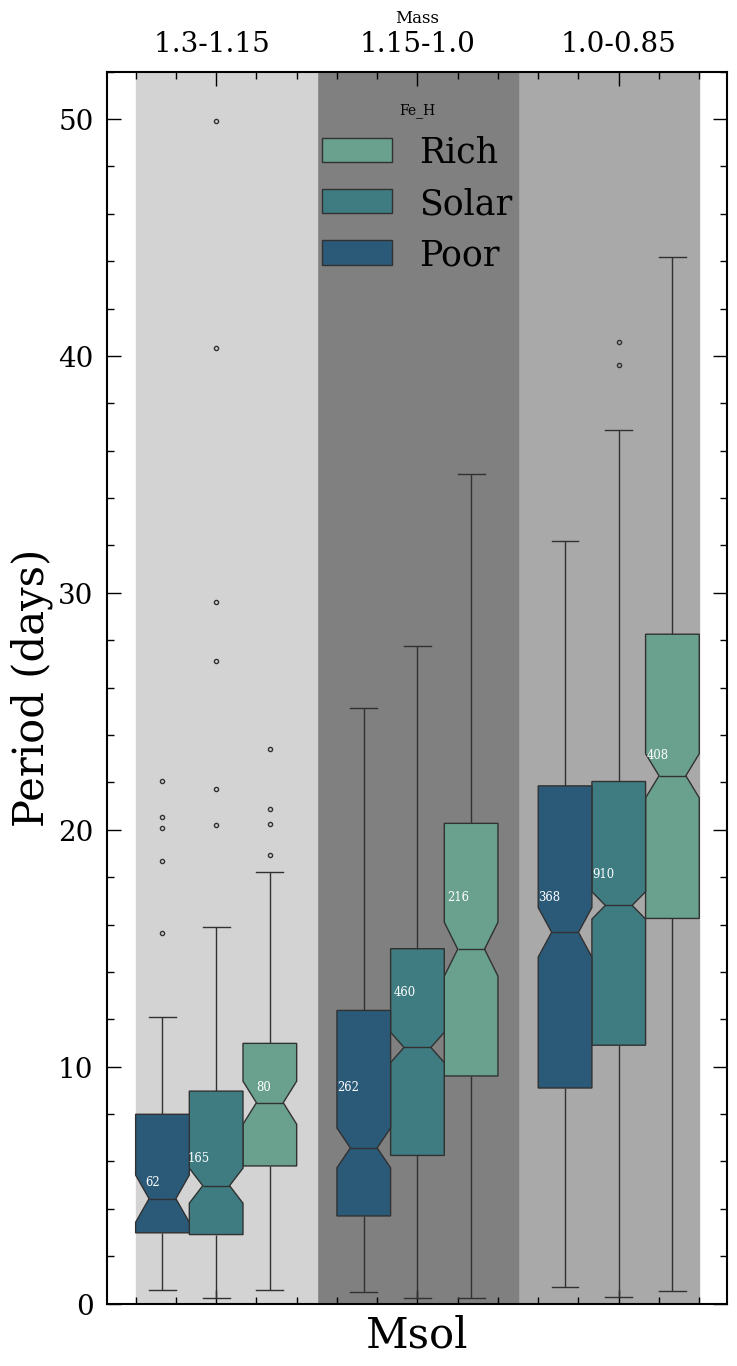

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 20,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 20,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
}
plt.rcParams.update(params)

data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', 'Fe_H', 'Mass']].dropna()

massbins = pd.cut(data['Mass'], (0.85, 1.0, 1.15, 1.3), include_lowest=True).dropna()
massbins = pd.Series.dropna(massbins)
fehbins = pd.cut(data['Fe_H'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()

data = data.drop(['Fe_H', 'Mass'], axis=1)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)
data = data.merge(massbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['Mass', 'Fe_H']).size().reset_index(name='counts')

plt.figure(figsize=(8,16))
ax = sns.boxplot(data=data, x='Mass', y='Prot', orient='v', hue='Fe_H', hue_order=('Rich', 'Solar', 'Poor'), palette='crest', fliersize=3, notch=True)

# plot info
ax.set_title('Mass')
ax.set_ylabel('Period (days)')
ax.set_xlabel('Msol')
ax.set_ylim(0, 52)
ax.set_xticklabels(('1.0-0.85', '1.15-1.0', '1.3-1.15 '))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# number of observations per box
ax.text(-0.14, 23, '408', size='small', color='w')
ax.text(0.13, 18, '910', size='small', color='w')
ax.text(0.4, 17, '368', size='small', color='w')
ax.text(0.85, 17, '216', size='small', color='w')
ax.text(1.12, 13, '460', size='small', color='w')
ax.text(1.4, 9, '262', size='small', color='w')
ax.text(1.8, 9, '80', size='small', color='w')
ax.text(2.14, 6, '165', size='small', color='w')
ax.text(2.35, 5, '62', size='small', color='w')

plt.savefig('metallicity.png')
plt.show()


![priii](usagi.webp "yaha")

# Period against Temperature Subdivided by Metallicity

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/1095667171.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['BP-G', 'Fe_H']).size().reset_index(name='counts')


          BP-G   Fe_H  counts
0  0.329-0.399   Poor     791
1  0.329-0.399  Solar    1010
2  0.329-0.399   Rich     466
3  0.399-0.459   Poor     393
4  0.399-0.459  Solar     648
5  0.399-0.459   Rich     335
6   0.459-0.62   Poor     372
7   0.459-0.62  Solar     667
8   0.459-0.62   Rich     311


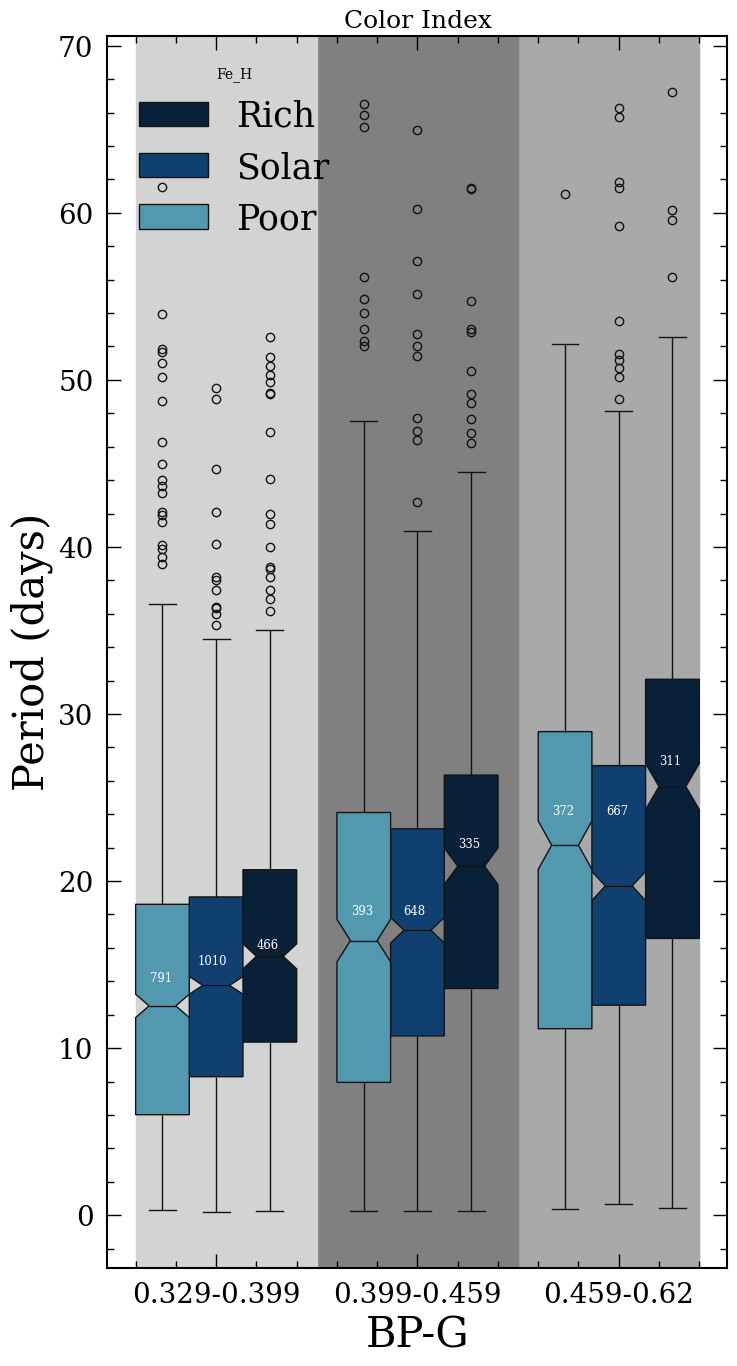

In [33]:
data = pd.read_csv('result.csv')[['GaiaDR2', 'Prot', 'BP-G', 'Fe_H']].dropna()
fehbins = pd.cut(data['Fe_H'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['BP-G'], (0.329, 0.399, 0.459, 0.62), labels=('0.329-0.399', '0.399-0.459', '0.459-0.62'), include_lowest=True).dropna()

data = data.drop(['BP-G', 'Fe_H'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['BP-G', 'Fe_H']).size().reset_index(name='counts')
print(counts)

plt.figure(figsize=(8,16))
ax = sns.boxplot(data=data, x='BP-G', y='Prot', orient='v', order=('0.459-0.62', '0.399-0.459', '0.329-0.399'), 
                 hue='Fe_H', hue_order=('Rich', 'Solar', 'Poor'), palette='ocean', notch=True)

# sets plot parameters
ax.set_title('Color Index', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('BP-G')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# counts number of observations
ax.text(-0.20, 27, '311', size='small', color='w')
ax.text(0.06, 24, '667', size='small', color='w')
ax.text(0.33, 24, '372', size='small', color='w')
ax.text(0.8, 22, '335', size='small', color='w')
ax.text(1.07, 18, '648', size='small', color='w')
ax.text(1.33, 18, '393', size='small', color='w')
ax.text(1.80, 16, '466', size='small', color='w')
ax.text(2.09, 15, '1010', size='small', color='w')
ax.text(2.33, 14, '791', size='small', color='w')

plt.savefig('prot_vs_color.png')
plt.show()

![priii](usagi.webp "yaha")

# Cross Reference w/ Gaia DR3 Metallicity Data 

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/2709443740.py:26: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('metallicitycompare.txt', sep='\s+')[['source_id', 'Prot', 'BP-G', 'mh_xgboost']].dropna()
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/2709443740.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['BP-G', 'mh_xgboost']).size().reset_index(name='counts')


          BP-G mh_xgboost  counts
0  0.329-0.399       Poor    1581
1  0.329-0.399      Solar    2461
2  0.329-0.399       Rich     901
3  0.399-0.459       Poor    1697
4  0.399-0.459      Solar    2189
5  0.399-0.459       Rich     824
6   0.459-0.62       Poor    2130
7   0.459-0.62      Solar    3092
8   0.459-0.62       Rich    1211


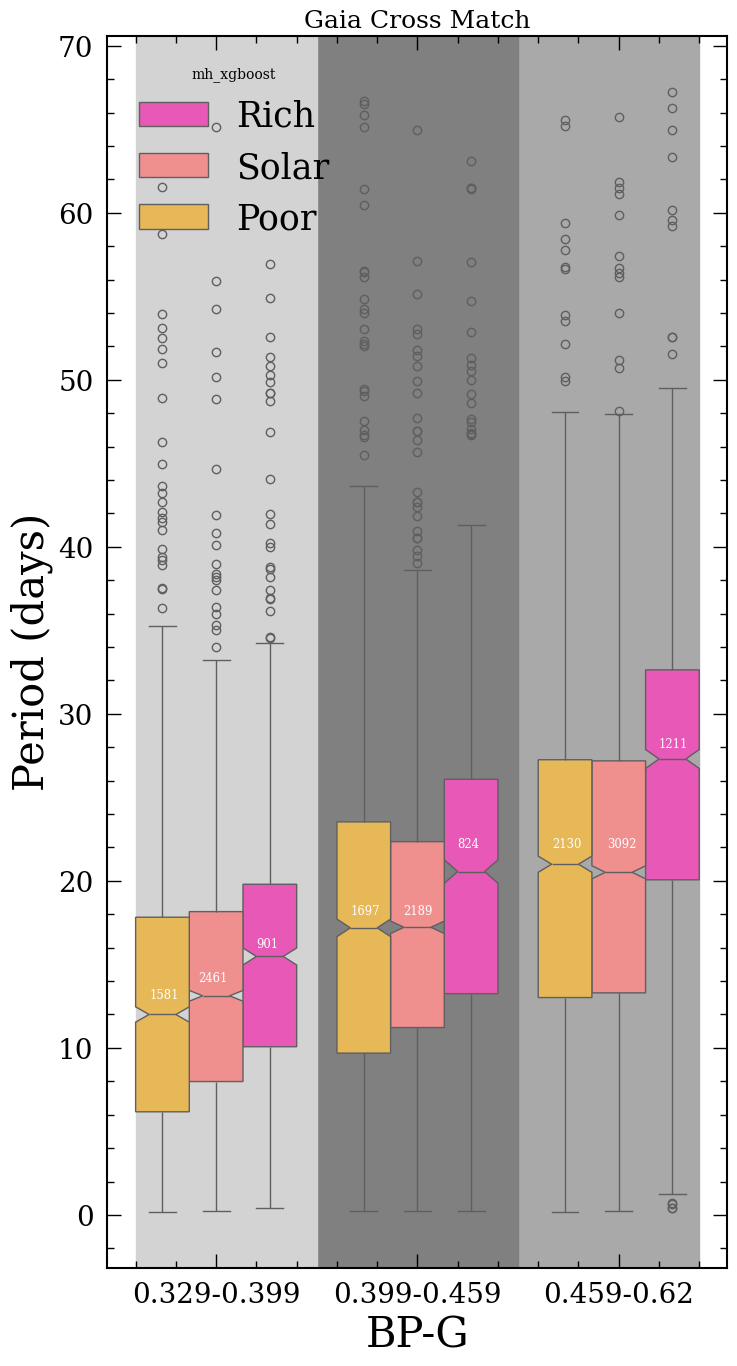

In [34]:
def read():
    '''
    Takes data from Armand et al. 2020 (Table 2; should be ~5.7 GB) and cross matches it with objects in result.csv
    to gauge accuracy of metallicity values in the latter
    '''

    # use np to ensure gaia ids rae 64-bit due to their large size
    #y = np.genfromtxt('result.csv', dtype=np.float64, delimiter=',', usecols=(0,11))
    #y = y[~np.isnan(y).any(axis=1)]

    #z = np.genfromtxt('table-1.csv', dtype=np.float64, delimiter=',', usecols=(0, 2))
    #z = z[~np.isnan(z).any(axis=1)]

    y = pd.read_csv('table-1.csv')[['source_id', 'mh_xgboost']]
    z = pd.read_csv('result.csv')[['GaiaDR2', 'BP-G', 'Prot']]

    result = pd.merge(y, z, left_on='source_id', right_on='GaiaDR2', how='inner')
    result = result.drop('GaiaDR2', axis=1)

    # result = np.concatenate((y, z), axis=0)

    result.to_csv('metallicitycompare.txt', sep=' ')

    return result

data = pd.read_csv('metallicitycompare.txt', sep='\s+')[['source_id', 'Prot', 'BP-G', 'mh_xgboost']].dropna()
fehbins = pd.cut(data['mh_xgboost'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['BP-G'], (0.329, 0.399, 0.459, 0.62), labels=('0.329-0.399', '0.399-0.459', '0.459-0.62'), include_lowest=True).dropna()

data = data.drop(['BP-G', 'mh_xgboost'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['BP-G', 'mh_xgboost']).size().reset_index(name='counts')
print(counts)

plt.figure(figsize=(8,16))
ax = sns.boxplot(data=data, x='BP-G', y='Prot', orient='v', order=('0.459-0.62', '0.399-0.459', '0.329-0.399'), 
                 hue='mh_xgboost', hue_order=('Rich', 'Solar', 'Poor'), palette='spring', notch=True)

# sets plot parameters
ax.set_title('Gaia Cross Match', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('BP-G')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# counts number of observations
ax.text(-0.20, 28, '1211', size='small', color='w')
ax.text(0.06, 22, '3092', size='small', color='w')
ax.text(0.33, 22, '2130', size='small', color='w')
ax.text(0.8, 22, '824', size='small', color='w')
ax.text(1.07, 18, '2189', size='small', color='w')
ax.text(1.33, 18, '1697', size='small', color='w')
ax.text(1.80, 16, '901', size='small', color='w')
ax.text(2.09, 14, '2461', size='small', color='w')
ax.text(2.33, 13, '1581', size='small', color='w')

plt.savefig('gaia_metallicities.png')
plt.show()

# Gaia but with Different Bins

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/3639481524.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('metallicitycompare.txt', sep='\s+')[['source_id', 'Prot', 'BP-G', 'mh_xgboost']].dropna()
/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/3639481524.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['BP-G', 'mh_xgboost']).size().reset_index(name='counts')


           BP-G mh_xgboost  counts
0   0.329-0.399       Poor     729
1   0.329-0.399     Poorer     851
2   0.329-0.399      Solar    2461
3   0.329-0.399     Richer     585
4   0.329-0.399       Rich     316
5   0.399-0.459       Poor     821
6   0.399-0.459     Poorer     876
7   0.399-0.459      Solar    2189
8   0.399-0.459     Richer     492
9   0.399-0.459       Rich     332
10   0.459-0.62       Poor    1028
11   0.459-0.62     Poorer    1102
12   0.459-0.62      Solar    3092
13   0.459-0.62     Richer     775
14   0.459-0.62       Rich     436


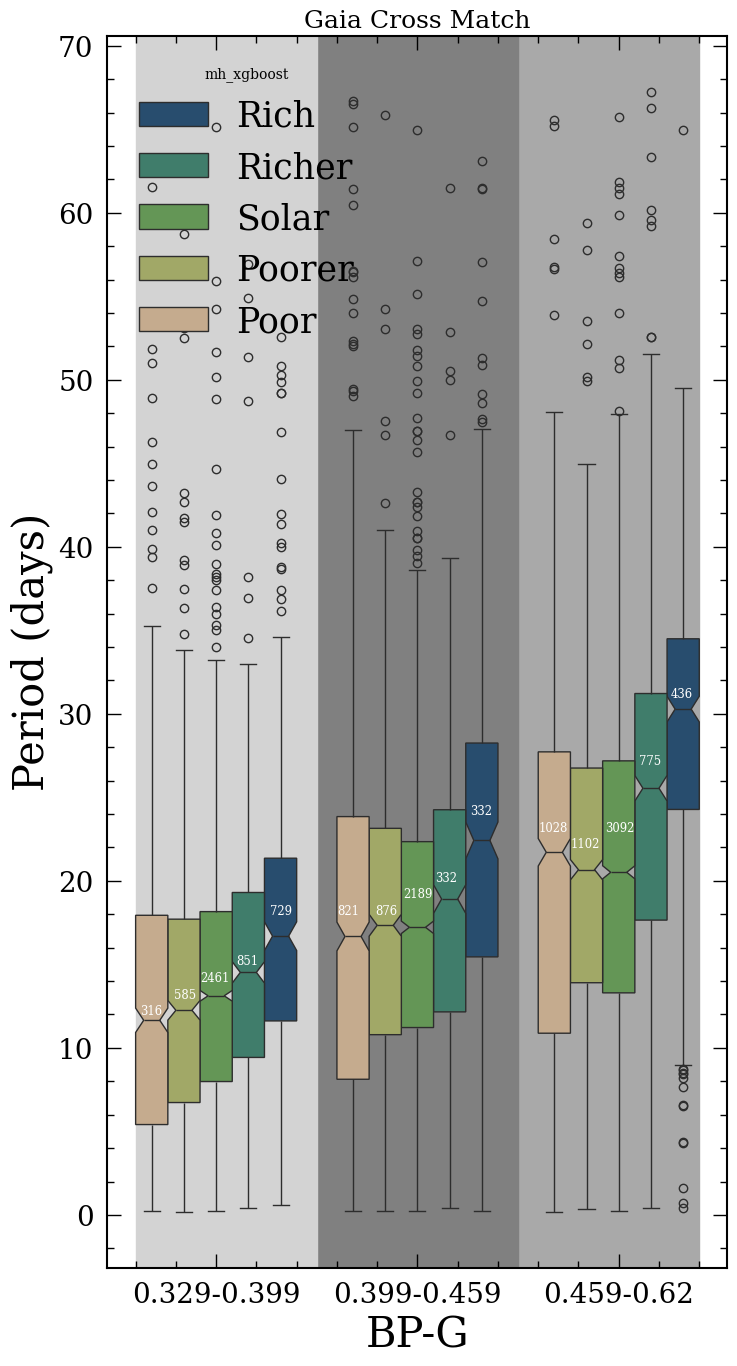

In [35]:
data = pd.read_csv('metallicitycompare.txt', sep='\s+')[['source_id', 'Prot', 'BP-G', 'mh_xgboost']].dropna()
fehbins = pd.cut(data['mh_xgboost'], (-1.5, -0.2, -0.1, 0.1, 0.2, 1.5),labels=('Poor', 'Poorer', 'Solar', 'Richer', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['BP-G'], (0.329, 0.399, 0.459, 0.62), labels=('0.329-0.399', '0.399-0.459', '0.459-0.62'), include_lowest=True).dropna()

data = data.drop(['BP-G', 'mh_xgboost'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['BP-G', 'mh_xgboost']).size().reset_index(name='counts')
print(counts)

plt.figure(figsize=(8,16))
ax = sns.boxplot(data=data, x='BP-G', y='Prot', orient='v', order=('0.459-0.62', '0.399-0.459', '0.329-0.399'), 
                 hue='mh_xgboost', hue_order=('Rich', 'Richer', 'Solar', 'Poorer', 'Poor'), palette='gist_earth', notch=True)

# sets plot parameters
ax.set_title('Gaia Cross Match', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('BP-G')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# counts number of observations
ax.text(-0.26, 31, '436', size='small', color='w')
ax.text(-0.10, 27, '775', size='small', color='w')
ax.text(0.07, 23, '3092', size='small', color='w')
ax.text(0.24, 22, '1102', size='small', color='w')
ax.text(0.40, 23, '1028', size='small', color='w')

ax.text(0.74, 24, '332', size='small', color='w')
ax.text(0.91, 20, '332', size='small', color='w')
ax.text(1.07, 19, '2189', size='small', color='w')
ax.text(1.21, 18, '876', size='small', color='w')
ax.text(1.40, 18, '821', size='small', color='w')

ax.text(1.73, 18, '729', size='small', color='w')
ax.text(1.90, 15, '851', size='small', color='w')
ax.text(2.08, 14, '2461', size='small', color='w')
ax.text(2.21, 13, '585', size='small', color='w')
ax.text(2.38, 12, '316', size='small', color='w')

plt.savefig('gaia_metallicities2.png')
plt.show()

# Crossmatching with Larger Data Sample

/var/folders/83/p2hnf5yj2c38r1spynzx0nhr0000gn/T/ipykernel_2353/27601567.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(by=['bp_rp', 'mh_xgboost']).size().reset_index(name='counts')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

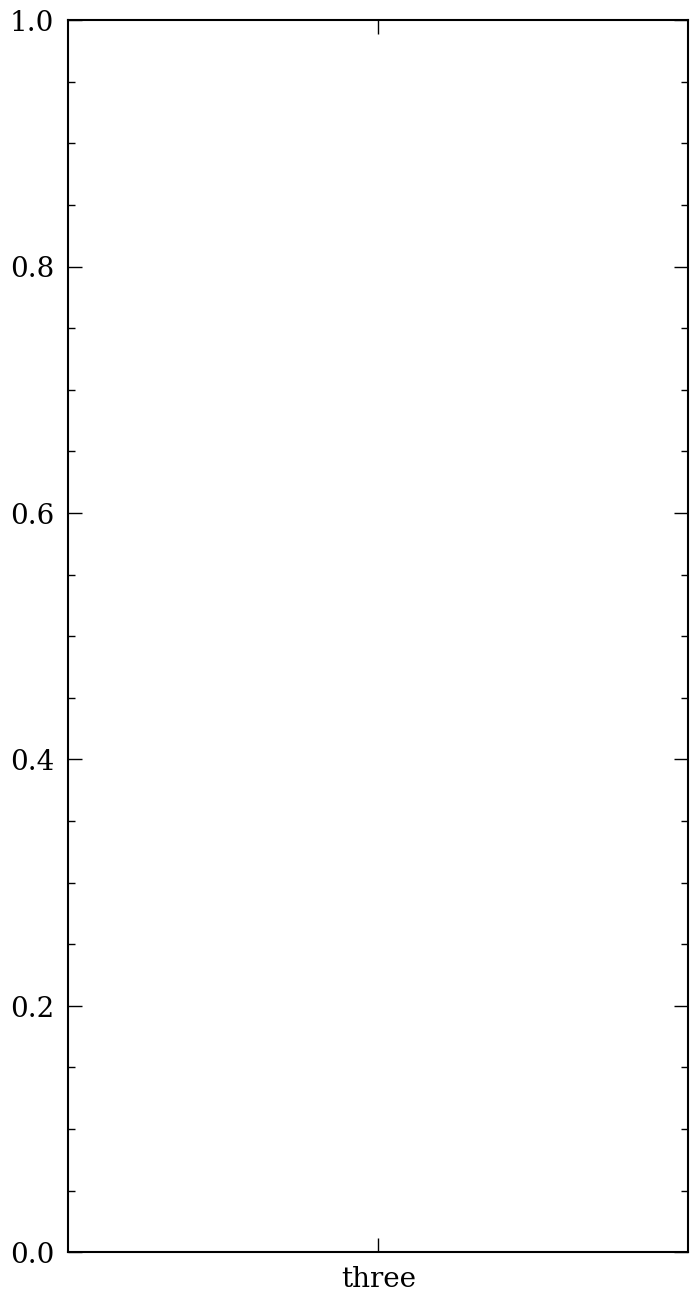

In [44]:
def domainexpand():
    df = pd.read_csv('table-1.csv') # read in xgboost metallicity
    df2 = pd.read_csv('All_prot.csv') # read in full rotation period data
    df = df.loc[df['source_id'].isin(df2['source_id'])]

    df = pd.merge(df, df2, left_on='source_id', right_on='source_id', how='inner')
    df.to_csv('morerotations.csv')
    return df


data = pd.read_csv('morerotations.csv', sep=',')[['source_id', 'Prot', 'bp_rp', 'mh_xgboost', 'survey']].dropna()

fehbins = pd.cut(data['mh_xgboost'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()
colorbins = pd.cut(data['bp_rp'], (0.65, 0.7, 0.77, 0.85), labels=('', 'two', 'three'), include_lowest=True).dropna()

data = data.drop(['bp_rp', 'mh_xgboost'], axis=1)
data = data.merge(colorbins, how='inner', left_index=True, right_index=True)
data = data.merge(fehbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['bp_rp', 'mh_xgboost']).size().reset_index(name='counts')

kepler = data.loc[data['survey'] == 'Kepler']
ztf = data.loc[data['survey'] == 'ZTF']
tess = data.loc[data['survey'] == 'TESS']

# kepler data
plt.figure(figsize=(8,16))
ax1 = sns.boxplot(data=kepler, x='bp_rp', y='Prot', orient='v', order=('three', 'two', 'one'), 
                 hue='mh_xgboost', hue_order=('Rich', 'Solar', 'Poor'), palette='spring', notch=False)

# sets plot parameters
ax.set_title('KEPLER', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('bp-rp')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')

plt.show()

# ztf data
plt.figure(figsize=(8,16))
ax1 = sns.boxplot(data=ztf, x='bp_rp', y='Prot', orient='v', order=('three', 'two', 'one'), 
                 hue='mh_xgboost', hue_order=('Rich', 'Solar', 'Poor'), palette='spring', notch=False)

# sets plot parameters
ax.set_title('ZTF', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('bp-rp')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')

plt.show()

# tess data
plt.figure(figsize=(8,16))
ax1 = sns.boxplot(data=tess, x='bp_rp', y='Prot', orient='v', order=('three', 'two', 'one'), 
                 hue='mh_xgboost', hue_order=('Rich', 'Solar', 'Poor'), palette='spring', notch=False)

# sets plot parameters
ax.set_title('TESS', size=18)
ax.set_ylabel('Period (days)')
ax.set_xlabel('bp-rp')
# ax.set_xticklabels(('Bluer', 'Solar', 'Redder'))
ax.invert_xaxis()
ax.tick_params(axis='x')

plt.show()

In [42]:
def domainexpand():
    df = pd.read_csv('table-1.csv') # read in xgboost metallicity
    df2 = pd.read_csv('1747678826287O-result.csv') # read in full rotation period data
    df = df.loc[df['source_id'].isin(df2['GaiaDR2'])]

    df = pd.merge(df, df2, left_on='source_id', right_on='GaiaDR2', how='inner')
    return df

# data = domainexpand()

print(data['bp_rp'])

colorbins = pd.cut(data['bp_rp'], (0.65, 0.7, 0.77, 0.85), include_lowest=True).dropna()
massbins = pd.Series.dropna(massbins)
fehbins = pd.cut(data['mh_xgboost'], (-2, -0.1, 0.1, 2),labels=('Poor', 'Solar', 'Rich'), ordered=False, include_lowest=True).dropna()

data = data.merge(fehbins, how='inner', left_index=True, right_index=True)
data = data.merge(massbins, how='inner', left_index=True, right_index=True)

counts = data.groupby(by=['bp_rp', 'mh_xgboost']).size().reset_index(name='counts')

plt.figure(figsize=(8,16))
ax = sns.boxplot(data=data, x='bp_rp', y='Prot', orient='v', hue='mh_xgboost', hue_order=('Rich', 'Solar', 'Poor'), palette='crest', fliersize=3, notch=True)

# plot info
ax.set_title('Mass')
ax.set_ylabel('Period (days)')
ax.set_xlabel('Msol')
ax.set_ylim(0, 52)
ax.set_xticklabels(('1.0-0.85', '1.15-1.0', '1.3-1.15 '))
ax.invert_xaxis()
ax.tick_params(axis='x', labeltop=True, labelbottom=False)
ax.axvspan(-0.4, 0.5, color='darkgrey')
ax.axvspan(0.5, 1.5, color='grey')
ax.axvspan(1.5, 2.4, color='lightgrey')

# number of observations per box
ax.text(-0.14, 23, '408', size='small', color='w')
ax.text(0.13, 18, '910', size='small', color='w')
ax.text(0.4, 17, '368', size='small', color='w')
ax.text(0.85, 17, '216', size='small', color='w')
ax.text(1.12, 13, '460', size='small', color='w')
ax.text(1.4, 9, '262', size='small', color='w')
ax.text(1.8, 9, '80', size='small', color='w')
ax.text(2.14, 6, '165', size='small', color='w')
ax.text(2.35, 5, '62', size='small', color='w')

plt.savefig('metallicity.png')
plt.show()

2           two
25        three
28          two
32        three
33          two
          ...  
155154      two
155166      two
155168      two
155171    three
155229    three
Name: bp_rp, Length: 33092, dtype: category
Categories (3, object): ['one' < 'two' < 'three']


TypeError: '<' not supported between instances of 'float' and 'str'

In [40]:
data['bp_rp']

2           two
25        three
28          two
32        three
33          two
          ...  
155154      two
155166      two
155168      two
155171    three
155229    three
Name: bp_rp, Length: 33092, dtype: category
Categories (3, object): ['one' < 'two' < 'three']